**Crafting Time Estimation**

In this assignment, we will be using regressions, of both the linear and non-linear persuasions.  We will be using these to create estimates in the amount of time required to get from a given crafting state to another crafting state, i.e. to produce a heuristic cost for the planning done in homework 2.  


We will be constructing the following models:

1. A linear regression solved via raw matrix operations, as discussed in class
2. A linear regression solved via numpy's library
3. A linear regression solved via Stochastic Gradient Descent with an artificial neural network
4. A linear regression using a deep artificial neural network
5. A non-linear regression using a deep artificial neural network

Finally, the non-linear regression will be used as the heuristic in an A* search of the planning space 

Our first step is to read the data in a form that is conducive for regression.  The data is a CSV file where the first row are the names of each column.  

In [1]:
import numpy as np
#Open the file
with open('crafting_times.csv','r') as infile:
    #Get the header line
    header = infile.readline().rstrip().split(',')
    data = []
    #Read it in
    for line in infile:
        data.append([float(s) for s in line.rstrip().split(',')])
    #turn our list of lists into a numpy array
    data = np.array(data)
    
print('\n'.join(header))
print(data.shape)

time
initial_bench
initial_cart
initial_coal
initial_cobble
initial_furnace
initial_ingot
initial_iron_axe
initial_iron_pickaxe
initial_ore
initial_plank
initial_rail
initial_stick
initial_stone_axe
initial_stone_pickaxe
initial_wood
initial_wooden_axe
initial_wooden_pickaxe
goal_bench
goal_cart
goal_coal
goal_cobble
goal_furnace
goal_ingot
goal_iron_axe
goal_iron_pickaxe
goal_ore
goal_plank
goal_rail
goal_stick
goal_stone_axe
goal_stone_pickaxe
goal_wood
goal_wooden_axe
goal_wooden_pickaxe
(30000, 35)


We see that the columns are: 
0 -- The time it takes
1-17 -- The initial state
18-35 -- The goal state

Now, we need to construct our X and Y matrices.

Luckily, *slicing* is very easy to do with numpy arrays.  *Slicing* is where we can easily specify how to take subsets of our matrix.  Think of it like indexing into an array, only we can do a lot of them at once.


The general syntax is:

`vector[a:b]`
`matrix[a:b,c:d]` 
`tensor[a:b,c:d,e:f]`

As a note, `a, b, c, d, e, f` are the indices you wish to get -- if `a` is blank it will start from the beginning and if `b` is blank it will go until the end.  Note: these can also be negative, which can be thought of as `n` away from the end.

Some examples:

`data[:,0]` -- Get all of the members of the first column 
`data[:,-1]` -- Get all of the members of the last column
`data[:a,1:]` -- Get the first `a` rows for the 2nd to last columns
`data[a:,1:]` -- Get all of the rows starting at `a` for the 2nd to last columns

As a note, you can get the dimensions of a numpy array by accessing `.shape`, a tuple of the dimensions

In [2]:
# We want to use a training/validation split to verify we are doing a good job
validation_split = 0.3

# TODO slice the data into the correct matrices for training and validation splits
# Let the first N*validation_split rows be for the validation set
# and the last N*(1-validation_split) rows be the training data
threshold: int = int(data.shape[0] * validation_split)
print(threshold)

Y_total: np.array = data[:, :1] #get all rows and the first column
Y: np.array = Y_total[threshold:, :] #begin at threshold rows and go to end. Take all columns.
Y_validation: np.array = Y_total[:threshold, :] #take up to threshold rows, take all columns

X_total: np.array = data[:, 1:] #get all rows and the everything but the first column
X: np.array = X_total[threshold: , :] #begin at threshhold rows and go to end, take all columns
X_validation = X_total[:threshold, :] #take up to threshold rows, take all columns

9000


Now we will use Least Squares Regression to estimate the time cost associated with a given state and end state.  

The least squares regression coefficients can be calculated via the closed form solution:

$\beta =  (X^T X)^{-1} X^T Y$

First try it out with using `np.dot` (anywhere there is a matrix multiplication) and `np.inv` (anywhere there is a matrix inversion. (as a note, matrix transposition is accomplished with `.T`)

Next, compare using `np.linalg.lstsq` -- numpy's built in least squares regression (that is much more stable than using the matrix inversion found here).

In [3]:
#Least Squares Estimation Goes Here

#TODO replace the np.zeros() with the correct code

def calculate_weights_with_linear_algebra(X: np.array, Y: np.array) -> np.array:

    return np.dot(np.dot(np.linalg.inv((np.dot(X.T, X))), X.T), Y)
    #return np.matmul(np.matmul(np.invert((np.matmul(X, X.T)).astype(np.int)), X.T), Y)

def calculate_weights_with_library(X: np.array, Y: np.array) -> np.array:
    return np.linalg.lstsq(X,Y)[0]


B_raw = calculate_weights_with_linear_algebra(X,Y)
B_lstsq = calculate_weights_with_library(X,Y)

#This should be small, mostly in the 1e-13 to 1e-14 range
print(B_raw-B_lstsq)

[[ 2.71782596e-13]
 [ 1.95932159e-12]
 [-2.23432384e-15]
 [-3.41948692e-14]
 [-2.91322522e-13]
 [-6.43929354e-14]
 [ 4.37871961e-13]
 [ 3.86579657e-13]
 [ 5.24580379e-15]
 [-3.01980663e-14]
 [-1.31006317e-14]
 [-2.19824159e-14]
 [-3.73034936e-14]
 [-6.21724894e-14]
 [ 2.38142839e-14]
 [-4.17443857e-14]
 [-2.13162821e-14]
 [ 8.58202398e-14]
 [-1.13686838e-13]
 [-1.95399252e-14]
 [ 3.10862447e-15]
 [-8.88178420e-14]
 [-1.42108547e-13]
 [ 6.11066753e-13]
 [-5.96855898e-13]
 [ 9.94759830e-14]
 [ 7.54951657e-15]
 [-2.62900812e-13]
 [-2.25375274e-14]
 [ 9.05941988e-14]
 [ 8.57092175e-14]
 [-2.66453526e-15]
 [-1.33226763e-13]
 [-3.01980663e-14]]


c:\users\kenny\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


Now we want to test our coefficients and see how well we predict the answer.  To do with we will need to use the weight vector we just learned.  Use `np.dot` to calculate:

$\hat{Y} = X\beta$

We will then calculate the *residual* the error that remains between our true times in Y and the calculated times in Yhat.

$resid = Y-\hat{Y} $

We will then use these residuals to come up with a single number that tells us how well we did.  For this, we will be using the Root Mean Squared Error (RMSE)

$RMSE = \sqrt{\frac{1}{N} \sum (y-\hat{y})^2}$

To use, this we will use the elementwise multiplication (`a*b` not `np.dot(a,b)`), the square root (`np.sqrt`), and mean (``np.mean``) functions

In [4]:
#TODO: Calculate Yhat, the residuals and RMSE for both the training and validation sets

def calculate_yhat(X: np.array, B: np.array) -> np.array:
    return np.dot(X, B)

def calculate_residuals(Y: np.array, Yhat: np.array) -> np.array:
    return Y - Yhat

def calculate_rmse(residuals: np.array) -> float:
    return np.sqrt(np.mean(np.square(residuals)))


Yhat = calculate_yhat(X, B_raw)
Yhat_validation = calculate_yhat(X_validation, B_raw)

residuals  = calculate_residuals(Y, Yhat)
residuals_validation  = calculate_residuals(Y_validation, Yhat_validation)

rmse = calculate_rmse(residuals)
rmse_validation = calculate_rmse(residuals_validation)

print('RMSE:',rmse)
print('RMSE Validation:',rmse_validation)


RMSE: 42.65085178953906
RMSE Validation: 64.96719644690694


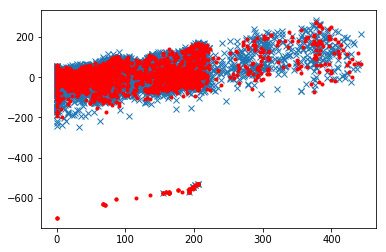

In [21]:
import matplotlib.pyplot as plt

#Now let's plot our points residuals
#Often, we'd like to plot our data, but we have a 30+dimensional space, i.e. one that's hard to visualize
plt.plot(Y,residuals,'x')
plt.plot(Y_validation,residuals_validation,'r.')
plt.show()

Previously, we learned a weight vector, but because we didn't have a bias term, the weight vector has to go through the origin, which might not be what we want.  Let's try it all again with a bias term this time.

To add a bias term, we will add a new column to our X matrix that is full of constants.  

Does it matter what constant term we choose?

The simplest way to do this is to use `hstack` which takes in a list of matrices and horizontally concatenates them (i.e. adds on new columns -- there exists a `vstack` that adds new rows).  The simpleest way to construct a constant term is to use `np.ones` which takes in a list with the number of ones to make for each dimension.

e.g.
`np.ones([4,2])` will make

1 1

1 1 

1 1

1 1

RMSE with bias term: 37.20703983274873
RMSE Validation with bias term: 57.37765716615744


c:\users\kenny\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


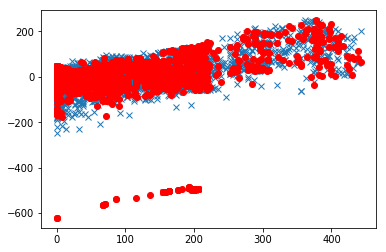

In [6]:
X_with_bias = np.hstack((X, np.ones([X.shape[0], 1])))
X_validation_with_bias = np.hstack((X_validation, np.ones([X_validation.shape[0], 1])))

B_with_bias = calculate_weights_with_library(X_with_bias, Y)

Yhat_with_bias = calculate_yhat(X_with_bias, B_with_bias)
Yhat_validation_with_bias = calculate_yhat(X_validation_with_bias, B_with_bias)

residuals_with_bias  = calculate_residuals(Y, Yhat_with_bias)
residuals_validation_with_bias  = calculate_residuals(Y_validation, Yhat_validation_with_bias)

rmse_with_bias = calculate_rmse(residuals_with_bias)
rmse_validation_with_bias = calculate_rmse(residuals_validation_with_bias)


print('RMSE with bias term:',rmse_with_bias)
print('RMSE Validation with bias term:',rmse_validation_with_bias)

plt.plot(Y,residuals_with_bias,'x')
plt.plot(Y_validation,residuals_validation_with_bias,'ro')
plt.show()

Now we are going to use artificial neural networks. We are going to be using PyTorch, one of the leading deep learning libraries.  Check https://pytorch.org/ to determine how to install PyTorch on your system. PyTorch can be run on the cpu or you can use the CUDA enabled version.  However, for this work, I am assuming you will be running on a CPU.  If you write your code to run on the GPU, make sure it is in a way that defaults to a cpu.  If you don't know how to do that, just don't do anything and it will default to the CPU.




First lets use stochastic gradient descent to train a weight vector as we did above.  

PyTorch lets us do this in a number of ways, but we will be doing the easiest possible one.  We are going to construct a `Sequential` model, with a `Linear` layer as its sole argument. `Sequential` can take in an arbitrary number of arguments, where each one is a layer that will be applied in the order that it is passed in.

The parameters you care about for `Linear` are:

`Linear(in_features, out_features, bias=True)`
    
`in_features` is the dimensionality of our input space -- in this case it will be the number of columns found in our X data
`out_features` is the dimensionality of the output space -- in this case, it will be 1 (all of our final `out_features` will always be 1, as our output is the single number we are predicting).  



In [7]:
import torch

# TODO construct the model
# Define a neural network model as a stack of layers
model = torch.nn.Sequential(torch.nn.Linear(X.shape[1], 1, bias=True))

print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1223,  0.0105, -0.1440,  0.0398, -0.1417,  0.1419,  0.1090, -0.1117,
         -0.0727, -0.0471,  0.1633, -0.0782,  0.1279, -0.0143,  0.0193,  0.0014,
          0.1477, -0.1093, -0.0126,  0.0269, -0.0923, -0.0104,  0.1670, -0.0056,
         -0.0697, -0.0711, -0.0142, -0.0619, -0.0947,  0.0332, -0.1449,  0.0832,
          0.1226, -0.0139]], requires_grad=True), Parameter containing:
tensor([-0.0778], requires_grad=True)]


Given our model, it's now time to train it.  First we need to convert our numpy matrices into PyTorch Tensors.  

Then we need to set up a couple of things --

First, we need to choose which optimizer we are going to use.  For this, let's just go with simple stochastic gradient descent.  `torch.optim.SGD(model.parameters(),lr=LR)` -- you'll need to pick a learning rate.  It's usually best to pick something relatively small, like say 0.01.

Then we need to choose our loss function.  If our goal is to do a regression, we should choose the loss function we chose before, i.e. Mean Square Error --  `torch.nn.MSELoss()`


Then, we need to loop over our dataset a number of times, i.e. a number of *epochs*.  At each step of the process we need to:

1. Zero the gradients from the previous epoch -- `optimizer.zero_grad()` and `model.zero_grad()`
2. Run the model in the forward direction -- `Yhat = model.forward(Xt)`
3. Calculate the loss between our predictions and the truth -- `loss = loss_fn(Yhat,Yt)`
4. Calculate back propagation of the loss through the network -- `loss.backward()`
5. Run the stochastic gradient descent and update the weights -- `optimizer.step()`

Some libraries hide all of these aspects, but PyTorch makes you do them explicitly.  It results in a little more code, but allows for some very fancy models (those involving different losses being calculated independently) to be done with very little change in the code.

In [8]:
# Convert our numpy arrays to torch tensors
Xt = torch.Tensor(X)
# To make Yt match the shape of Yhat, we'll need it to be a slightly different shape
Yt = torch.Tensor(Y.reshape((len(Y), 1)))


def train(X: torch.Tensor, Y: torch.Tensor, model: torch.nn.Module, epochs: int) -> None:
    # TODO set the optimizer and loss functions
    optimizer = torch.optim.SGD(model.parameters(), lr=.01)

    # TODO set the loss function
    # We'll use mean squared error as our loss function
    loss_fn = torch.nn.MSELoss()
    for t in range(epochs):

        # TODO do the training steps here
        # 1. zero the gradient buffers
        optimizer.zero_grad()
        model.zero_grad()
        # 1. Clear out the "gradient", i.e. the old update amounts
        Yhat = model.forward(X)
        # 2. Make a prediction
        loss = loss_fn(Yhat, Y)
        # 3. Calculate loss (the error of the residual)

        if t % 100 == 0:
            print(t, loss.item())

        loss.backward()
        # 4. Run the loss backwards through the graph
        optimizer.step()
        # 5. Run the optimizer to update the weights

train(Xt, Yt, model, 5000)

0 9419.453125
100 3034.1533203125
200 2506.250244140625
300 2254.27490234375
400 2093.731689453125
500 1976.47509765625
600 1884.197509765625
700 1808.75732421875
800 1745.889892578125
900 1692.971435546875
1000 1648.17236328125
1100 1610.1119384765625
1200 1577.6981201171875
1300 1550.0447998046875
1400 1526.4212646484375
1500 1506.21923828125
1600 1488.9283447265625
1700 1474.1192626953125
1800 1461.4283447265625
1900 1450.5472412109375
2000 1441.21435546875
2100 1433.206298828125
2200 1426.3330078125
2300 1420.4322509765625
2400 1415.3651123046875
2500 1411.012939453125
2600 1407.2742919921875
2700 1404.06201171875
2800 1401.3016357421875
2900 1398.9293212890625
3000 1396.89013671875
3100 1395.13720703125
3200 1393.6302490234375
3300 1392.33447265625
3400 1391.2203369140625
3500 1390.2623291015625
3600 1389.4383544921875
3700 1388.729736328125
3800 1388.1202392578125
3900 1387.5960693359375
4000 1387.14501953125
4100 1386.757080078125
4200 1386.42333984375
4300 1386.13623046875
4400

Now we want to see how it did.  We will plot the residuals (i.e. the error) for both our training set and our validation set.  It is always important to have a validation set, as it will let us see how well our model is over (or under) fitting the data.

(21000, 1)
(21000, 1)


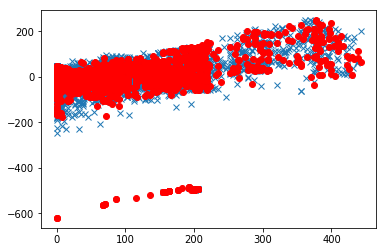

RMSE: 37.215376855267486
Validation RMSE: 57.30775563876361


In [9]:
Yhat = model.forward(Xt).data.numpy()
print(Y.shape)
print(Yhat.shape)

residual  = calculate_residuals(Y, Yhat)

plt.plot(Y,residual,'x')


Yhat_validation = model.forward(torch.Tensor(X_validation)).data.numpy()

residual_validation  = calculate_residuals(Y_validation, Yhat_validation)

plt.plot(Y_validation,residual_validation,'ro')
plt.show()


print('RMSE:',calculate_rmse(residual))
print('Validation RMSE:',calculate_rmse(residual_validation))


...And we do just about the same as we did before.

Now let's try it with some hidden layers.  Instead of just 1 Linear layer, we will have multiple layers.  As with the last one, we will have to specify the in_dimensions (identical to that one).  However, instead of an out_dimension of 1, we will go to the number of hidden_units, let's say 100.  Then we will have an output layer, which will go from our hidden_units dimension to an out_dimension of 1.

Again, your model summary should look similar to below (layer weights will be different)


In [10]:
hidden_units = 100
#TODO construct the model
# Define a neural network model as a stack of layers
model = torch.nn.Sequential(torch.nn.Linear(X.shape[1], hidden_units, bias=True), torch.nn.Linear(hidden_units, 1, bias=True))


print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0162, -0.0163,  0.0065,  ..., -0.0232, -0.1385,  0.0274],
        [ 0.1421, -0.0355, -0.1399,  ..., -0.1576, -0.1166,  0.0216],
        [ 0.0971, -0.1608, -0.0177,  ...,  0.0499, -0.1653, -0.1223],
        ...,
        [ 0.0121,  0.0678,  0.0509,  ...,  0.0818, -0.0059,  0.0034],
        [ 0.1132, -0.1405,  0.0156,  ...,  0.0030,  0.1222, -0.1216],
        [-0.1146, -0.1614,  0.1056,  ..., -0.0532, -0.0704,  0.0251]],
       requires_grad=True), Parameter containing:
tensor([ 0.1369, -0.0975, -0.1603,  0.1459, -0.0849,  0.1300, -0.0732,  0.0347,
         0.0917, -0.1431, -0.0633, -0.1662, -0.1007, -0.1541, -0.1644, -0.0771,
         0.0238,  0.0322,  0.1217,  0.0946,  0.0100,  0.1651,  0.1481, -0.0268,
         0.0610, -0.1015,  0.0378, -0.1442, -0.0774,  0.0516,  0.1241,  0.0158,
         0.0413,  0.0566,  0.0815, -0.0299,  0.0108, -0.0848,  0.1631, -0.0885,
         0.1416, -0.1575,  0.1398,  0.1509, -0.0923, -0.1585, -0.1702,  0.1473,
         0.12

Copy your training code from above and let's see how well it does.

In [11]:
train(Xt,Yt,model, 300)

0 9381.2353515625
100 nan
200 nan


Hmmmm.....that's no good. Our loss quickly explodes and goes to nan.  This is cause by our stochastic gradient descent ping-ponging back and forth.  Instead of converging it keeps overshooting more and more until it goes beyond the floating point limit.  Obviously, that isn't what we want.

We can address this in one of 2 ways:

1. We can shrink out learning rate to a small enough value that this no longer occurs
2. We can clip our gradients to make sure they don't exceed a specific value

We can do it the first way, but that will slow our training.  The second can be achieved by adding a step into our training process:


1. Zero the gradients from the previous epoch -- `optimizer.zero_grad()` and `model.zero_grad()`
2. Run the model in the forward direction -- `Yhat = model.forward(Xt)`
3. Calculate the loss between our predictions and the truth -- `loss = loss_fn(Yhat,Yt)`
4. Calculate back propagation of the loss through the network -- `loss.backward()`
5. **Clip the gradients** -- `torch.nn.utils.clip_grad_norm_(model.parameters(),5)`
6. Run the stochastic gradient descent and update the weights -- `optimizer.step()`

Copy your model construction with the hidden layers from above, and then set up an optimization loop with gradient clipping.

In [12]:
hidden_units = 100
#TODO construct the model
# Define a neural network model as a stack of layers
model = torch.nn.Sequential(torch.nn.Linear(X.shape[1], hidden_units, bias=True), torch.nn.Linear(hidden_units, 1, bias=True))


def train_with_gradient_clipping(X: torch.Tensor, Y: torch.Tensor, model: torch.nn.Module, epochs:int) -> None:
    #TODO set the optimizer and loss functions
    optimizer = torch.optim.SGD(model.parameters(), lr=.01)

    #TODO set the loss function
    # We'll use mean squared error as our loss function
    loss_fn = torch.nn.MSELoss()
    for t in range(epochs):

        #TODO do the training steps here
        #1. zero the gradient buffers
        optimizer.zero_grad()
        #1. Clear out the "gradient", i.e. the old update amounts
        model.zero_grad()
        #2. Make a prediction
        Yhat = model.forward(X)
        #3. Calculate loss (the error of the residual)
        loss = loss_fn(Yhat,Y)

        if t % 100 == 0:
            print(t,loss.item())

        #4. Run the loss backwards through the graph
        loss.backward()
        #5. Clip the gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(),5)
        #6. Run the optimizer to update the weights
        optimizer.step()
    
train_with_gradient_clipping(Xt,Yt,model, 5000)

0 9367.9287109375
100 6084.0322265625
200 3745.2216796875
300 2435.5107421875
400 1877.4583740234375
500 1653.1934814453125
600 1529.10498046875
700 1461.9012451171875
800 1426.4195556640625
900 1407.9984130859375
1000 1398.529296875
1100 1393.68701171875
1200 1391.215087890625
1300 1389.9521484375
1400 1389.3050537109375
1500 1388.9716796875
1600 1388.7984619140625
1700 1388.7073974609375
1800 1388.6585693359375
1900 1388.63134765625
2000 1388.6156005859375
2100 1388.6058349609375
2200 1388.59912109375
2300 1388.59423828125
2400 1388.590087890625
2500 1388.58642578125
2600 1388.5831298828125
2700 1388.580078125
2800 1388.5770263671875
2900 1388.5740966796875
3000 1388.5712890625
3100 1388.568359375
3200 1388.5655517578125
3300 1388.5628662109375
3400 1388.56005859375
3500 1388.557373046875
3600 1388.5546875
3700 1388.552001953125
3800 1388.5491943359375
3900 1388.546630859375
4000 1388.5439453125
4100 1388.541259765625
4200 1388.538818359375
4300 1388.5362548828125
4400 1388.533691406

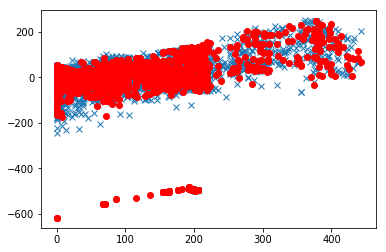

RMSE: 37.26282229420496
Validation RMSE: 57.18037772121998


In [13]:
Yhat = model.forward(Xt).data.numpy()

residual  = calculate_residuals(Y, Yhat)

plt.plot(Y,residual,'x')


Yhat_validation = model.forward(torch.Tensor(X_validation)).data.numpy()

residual_validation  = calculate_residuals(Y_validation, Yhat_validation)

plt.plot(Y_validation,residual_validation,'ro')
plt.show()


print('RMSE:',calculate_rmse(residual))
print('Validation RMSE:',calculate_rmse(residual_validation))

Wait, that looks just like it did before!  The key to neural networks comes from the non-linear activations.  No matter how many layers we add, so long as the rank of the hidden layers is $\geq$ the rank of the original vector, the best we can do is the least squares estimation (as it is the maximum likelihood estimator for a linear regression).  If the rank is decreased, then we are doing some form of compression, akin to Principal Component Analysis.  Let's try it with a bit of nonlinearity. 

Let's do a single hidden layer with a non-linear activation -- we will use the Rectified Linear Unit (ReLU) as it is fast and all we really care about is ANY kind of nonlinearity (sometimes we care about our nonlinearity having a specific meaning or mapping into a specific range (0 to 1, -1 to 1, etc.).

This means we should now have a Sequential model with

1. A Linear layer going from our input dimension to the number of hidden units
2. A ReLU activation layer -- `torch.nn.ReLU()`
3. A Linear layer going from our hidden units to 1


In [14]:
hidden_units = 100
#TODO construct the model
# Define a neural network model as a stack of layers
model = torch.nn.Sequential(torch.nn.Linear(X.shape[1], hidden_units, bias=True), torch.nn.ReLU(), torch.nn.Linear(hidden_units, 1, bias=True))
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1556, -0.0429, -0.1476,  ...,  0.0647,  0.0422,  0.0964],
        [-0.0863, -0.1707,  0.0108,  ..., -0.1612, -0.1039, -0.1100],
        [-0.1369,  0.0920, -0.0754,  ..., -0.1508, -0.0100, -0.1269],
        ...,
        [ 0.0620, -0.1438,  0.0028,  ..., -0.0904, -0.1349, -0.1573],
        [ 0.1503, -0.0145,  0.1548,  ...,  0.1064, -0.1695, -0.1636],
        [ 0.0279,  0.1711,  0.0862,  ..., -0.1649,  0.1662, -0.0593]],
       requires_grad=True), Parameter containing:
tensor([ 0.0390,  0.1549,  0.1076, -0.1135,  0.1076,  0.1711, -0.0338, -0.0335,
        -0.1356, -0.0449, -0.1265,  0.0628, -0.1480,  0.0757,  0.1094,  0.1041,
         0.0823, -0.0273,  0.0071, -0.1393,  0.0532, -0.0433,  0.0327, -0.1328,
         0.0987, -0.0860, -0.0851, -0.1713,  0.0297,  0.0599,  0.1686, -0.0751,
        -0.1516, -0.0973,  0.1063,  0.1202,  0.0973,  0.1638, -0.0597, -0.1515,
        -0.0768,  0.0109,  0.0910, -0.1703, -0.1496,  0.0348, -0.1430, -0.0088,
        -0.05

Use the optimization code with the gradient clipping from above to train our new, non-linear, model.  I recommend letting it run for about 10000 epochs.


In [15]:
train_with_gradient_clipping(Xt,Yt,model, 10000)

0 9384.7763671875
100 6271.43701171875
200 3870.163330078125
300 2447.5185546875
400 1695.2972412109375
500 1170.322998046875
600 974.5184936523438
700 906.7769775390625
800 876.4112548828125
900 857.6600341796875
1000 842.39892578125
1100 828.107421875
1200 814.5261840820312
1300 800.8159790039062
1400 786.7867431640625
1500 771.79248046875
1600 755.5336303710938
1700 737.9085083007812
1800 719.2559814453125
1900 699.4881591796875
2000 678.836669921875
2100 658.0883178710938
2200 637.2787475585938
2300 616.7684326171875
2400 597.01953125
2500 578.3680419921875
2600 560.7313232421875
2700 544.2703247070312
2800 528.8110961914062
2900 514.3836059570312
3000 500.9592590332031
3100 488.4705505371094
3200 476.85284423828125
3300 466.2244567871094
3400 456.3403015136719
3500 447.1253967285156
3600 438.5317687988281
3700 430.45343017578125
3800 422.79766845703125
3900 415.51251220703125
4000 408.6529541015625
4100 402.1925048828125
4200 396.14752197265625
4300 390.4472351074219
4400 385.0418

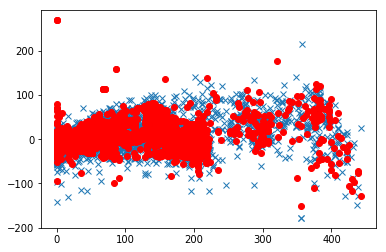

RMSE: 16.61185827223339
Validation RMSE: 17.09250606303869


In [16]:
Yhat = model.forward(Xt).data.numpy()

residual  = calculate_residuals(Y, Yhat)

plt.plot(Y,residual,'x')


Yhat_validation = model.forward(torch.Tensor(X_validation)).data.numpy()

residual_validation  = calculate_residuals(Y_validation, Yhat_validation)

plt.plot(Y_validation,residual_validation,'ro')
plt.show()


print('RMSE:',calculate_rmse(residual))
print('Validation RMSE:',calculate_rmse(residual_validation))

Ah, that looks better.  Note, you are probably overfitting (it is the tendency of these techniques), you can try some form of regularization (e.g., dropout) to reduce this overfitting for extra-credit.  

You can try to explore different network topologies (different numbers of layers, different activation functions) and different training techniques to see how well you can do on the validation set.

Now, let's use this as a heuristic for our search.

Below are the helper functions needed -- use them in your A* implementation

In [17]:
import json
from typing import NamedTuple, Dict, Tuple, Optional, Sequence, List, Set, FrozenSet
import array
import heapq
import time
import itertools

with open('Crafting.json') as f:
    Crafting = json.load(f)
items_by_index = list(sorted(Crafting['Items']))
items_to_indices = {item: index for index, item in enumerate(items_by_index)}

class State:

    def __init__(self, items=None) :
        if items is not None:
            # Copying a state from an old state.
            # This call to the array constructor creates an array of unsigned integers and initializes it from the contents of items.
            self.items = array.array('I', items)
        else:
            self.items = array.array('I', [0 for item in items_by_index])

    def __add__(self, other):
        s = State(self.items)
        # A. How do we add together the contents of two states?
        for ii,oi in enumerate(other.items):
            s.items[ii] += oi
        return s
    def __sub__(self, other):
        s = State(self.items)
        # A. How do we add together the contents of two states?
        for ii,oi in enumerate(other.items):
            s.items[ii] -= oi
        return s

    def __ge__(self, other):
        # C. How do we know whether one state (self) contains everything that's inside of another (other)? 
        for si,oi in zip(self.items,other.items):
            if si < oi:
                return False
        return True
        
    def __lt__(self, other):
        return not (self >= other)

    def __eq__(self, other):
        return self.items == other.items

    def __hash__(self):
        hsh = 5381
        for s in self.items:
            hsh = ((hsh << 5) + hsh) + s
        return hsh

    def __str__(self):
        out_str = []
        for k,v  in self.to_dict().items():
            out_str.append('{}:{}'.format(k,v))
        return ','.join(out_str)

    def to_dict(self):
        return {items_by_index[idx]: self.items[idx]
                for idx in range(len(self.items))}

    @classmethod
    def from_dict(cls, item_dict: Dict[str, int]) -> 'State':
        return cls([
            item_dict.get(item, 0) for item in items_by_index
        ])
    
class Recipe(NamedTuple):
    produces: State
    consumes: State
    requires: State
    cost: int

recipes: Dict[str, Recipe] = {}
for name, rule in Crafting['Recipes'].items():
    recipes[name] = Recipe(
        State.from_dict(rule.get('Produces', {})),
        State.from_dict(rule.get('Consumes', {})),
        State.from_dict({item: 1 if req else 0
                         for item, req in rule.get('Requires', {}).items()}),
        rule['Time']
    )
    
def preconditions_satisfied(state: State, recipe: Recipe) -> bool:
    return state >= recipe.consumes and state >= recipe.requires

def apply_effects(state: State, recipe: Recipe) -> State:
    return state-recipe.consumes+recipe.produces

In [18]:
import random

def states_to_tensor(initial_state:State , goal_state:State) -> torch.Tensor:
    items = ['bench','cart','coal','cobble',
     'furnace','ingot','iron_axe',
     'iron_pickaxe','ore','plank','rail',
     'stick','stone_axe','stone_pickaxe',
     'wood','wooden_axe','wooden_pickaxe']
    data = []
    initial_state = initial_state.to_dict()
    goal_state = goal_state.to_dict()
    for i in items:
        data.append([initial_state[i]])
    for i in items:
        data.append([goal_state[i]])
    return torch.Tensor(np.array(data).T)


def get_heuristic(current_state:State , goal_state:State) -> float:
    return model.forward(states_to_tensor(current_state,goal_state)).data.numpy()[0,0]


pruning = [State.from_dict({'cobble':9}),
           State.from_dict({'wood':3}),
           State.from_dict({'plank':9}),
           State.from_dict({'ore':2}),
           State.from_dict({'stick':6}),
           State.from_dict({'bench':2}),
           State.from_dict({'furnace':2}),
           State.from_dict({'iron_axe':2}),
           State.from_dict({'iron_pickaxe':2}),
           State.from_dict({'stone_axe':2}),
           State.from_dict({'stone_pickaxe':2}),
           State.from_dict({'wooden_axe':2}),
           State.from_dict({'wooden_pickaxe':2}),
           State.from_dict({'coal':2})]

def prune(state:State) -> bool:
    to_prune = False
    for p in pruning:
        if state >= p:
            to_prune = True
            break
                        
    return to_prune

In [19]:
#TODO implement A* search
#It should return a tuple of the number of states visited, the time cost, 
#and the path of recipes it takes (as a list of recipe names)
#Break the loop when you have visited max_nodes
#I recommend using the above prune method after applying a recipe 
#but before adding a node to the open set

def a_star(initial:State, goal:State, max_nodes:int) -> Tuple[int, int,Optional[List[str]]]:
    visited = 0
    q: List[Tuple[int, State]] = []
    heapq.heappush(q, (0, initial))
    best_costs: Dict[State, int] = {initial: 0}
    best_from: Dict[State, List[str]] = {initial: []}
    seen: set = set()
    seen.add(initial)
    while q and visited < max_nodes:
        current: State = heapq.heappop(q)[1]
        visited += 1
        if current >= goal:
            return (visited, best_costs[current], best_from[current])
        for key, recipe in recipes.items():
                if preconditions_satisfied(current, recipe):
                    resultant = apply_effects(current, recipe)
                    cost = best_costs[current] + recipe.cost
                    heuristic = cost + get_heuristic(resultant, goal)
                    if not prune(resultant):
                        if resultant not in seen:
                            heapq.heappush(q, (heuristic, resultant))
                            seen.add(resultant)
                        if best_costs.get(resultant) is None or best_costs.get(resultant) > cost:
                            best_costs.update({resultant: cost})
                            best_from.update({resultant: best_from[current] + [key]})
    return visited, -1, None

In [20]:
print(a_star(State.from_dict({'wood':1}),State.from_dict({'wooden_pickaxe':1}),1000))
print(a_star(State.from_dict({'wood':1}),State.from_dict({'iron_pickaxe':1}),20000))
print(a_star(State.from_dict({}),State.from_dict({'rail':1}),20000))
print(a_star(State.from_dict({}),State.from_dict({'cart':1}),20000))

(16, 14, ['craft plank', 'craft bench', 'punch for wood', 'craft plank', 'craft stick', 'punch for wood', 'craft plank', 'craft wooden_pickaxe at bench'])
(649, 140, ['craft plank', 'craft bench', 'punch for wood', 'craft plank', 'craft stick', 'punch for wood', 'craft plank', 'craft wooden_pickaxe at bench', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'craft stone_axe at bench', 'stone_axe for wood', 'craft stick', 'stone_axe for wood', 'wooden_pickaxe for cobble', 'wooden_pickaxe for coal', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'craft furnace at bench', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'wooden_pickaxe for cobble', 'craft stone_pickaxe at bench', 'stone_pickaxe for ore', 'smelt ore in furnace', 'stone_pickaxe for ore', 'stone_pickaxe for coal', 'smelt ore 